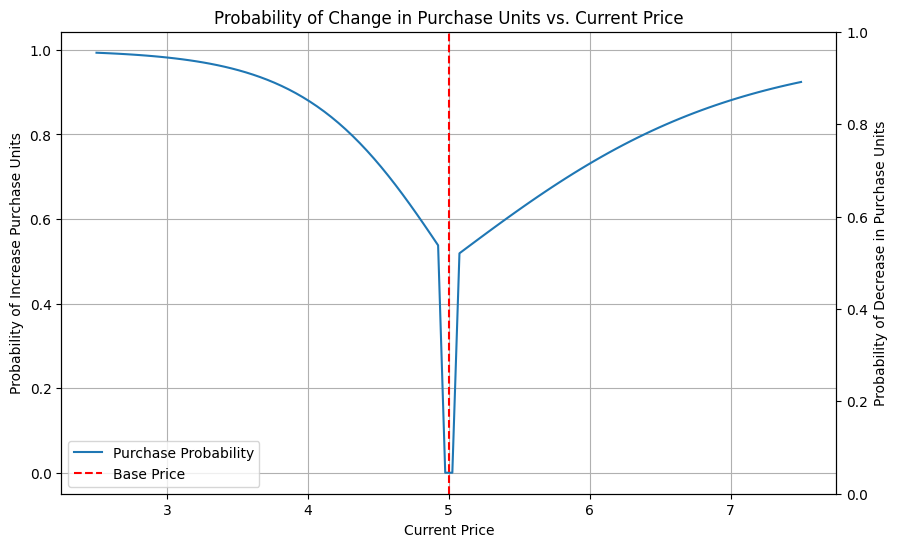

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import math

def percent_difference(base_price, current_price):
    """
    Calculate the percent difference between the base price and the current price.

    Parameters:
    base_price (float): The base price.
    current_price (float): The current price.

    Returns:
    float: The percent difference expressed as a decimal.
    """
    if base_price == 0:
        raise ValueError("Base price cannot be zero.")
    
    difference = current_price - base_price
    percent_diff = difference / base_price
    return percent_diff

def logistic(x):
    """
    Logistic function to map any real-valued number into the range (0, 1).

    Parameters:
    x (float): The input value.

    Returns:
    float: The output of the logistic function.
    """
    return 1 / (1 + math.exp(-x))

def purchase_probability(base_price, current_price, sensitivity_increase=10, sensitivity_decrease=10, threshold=0.01):
    """
    Calculate the probability that an agent will purchase more or fewer units based on the price change.

    Parameters:
    base_price (float): The base price.
    current_price (float): The current price.
    sensitivity_increase (float): The sensitivity factor for price increases.
    sensitivity_decrease (float): The sensitivity factor for price decreases.
    threshold (float): The threshold around zero percent difference where the probability is zero.

    Returns:
    float: The probability of purchasing more units (for a price decrease) or fewer units (for a price increase).
    """
    percent_diff = percent_difference(base_price, current_price)
    
    # Handle the threshold around zero percent difference
    if abs(percent_diff) < threshold:
        return 0.0
    
    # Use the logistic function to model the probability
    if percent_diff < 0:
        # For a price decrease, the probability of purchasing more units increases
        probability = logistic(abs(percent_diff) * sensitivity_decrease)  # Adjust the sensitivity with the scaling factor
    else:
        # For a price increase, the probability of purchasing fewer units increases
        probability = logistic(abs(percent_diff) * sensitivity_increase)  # Adjust the sensitivity with the scaling factor
    
    return probability

# Parameters
base_price = 5.00
price_range = np.linspace(2.50, 7.50, 100)
sensitivity_increase = 5
sensitivity_decrease = 10
threshold = 0.01  # 1% threshold

# Calculate probabilities
probabilities = [purchase_probability(base_price, price, sensitivity_increase, sensitivity_decrease, threshold) for price in price_range]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(price_range, probabilities, label='Purchase Probability')
ax1.axvline(base_price, color='r', linestyle='--', label='Base Price')
ax1.set_xlabel('Current Price')
ax1.set_ylabel('Probability of Increase Purchase Units')
ax1.set_title('Probability of Change in Purchase Units vs. Current Price')
ax1.legend()
ax1.grid(True)

# Create a second y-axis for the decrement label
ax2 = ax1.twinx()
ax2.set_ylabel('Probability of Decrease in Purchase Units')

plt.show()